# Zomato data Analysis


## Importing libraries

> What type of restaurant do the majority of customers order from?
> How many votes has each type of restaurant received from customers?
> What are the ratings that the majority of restaurants have received?
> Zomato has observed that most couples order most of their food online. What is the average spending on each order?
> Which mode (online or offline) has received the maximum rating?
> Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_excel(r"C:\Users\mosib\Downloads\zomato.data.ods", engine="odf")

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## lets convert data type of "rate " column and make it float

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [61]:
def Handle_rate(value) :
    value=str(value).split("/")
    value=value[0]
    return float ( value )

df["rate"]=  df["rate"].apply(Handle_rate) 

In [60]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## type of Resturant

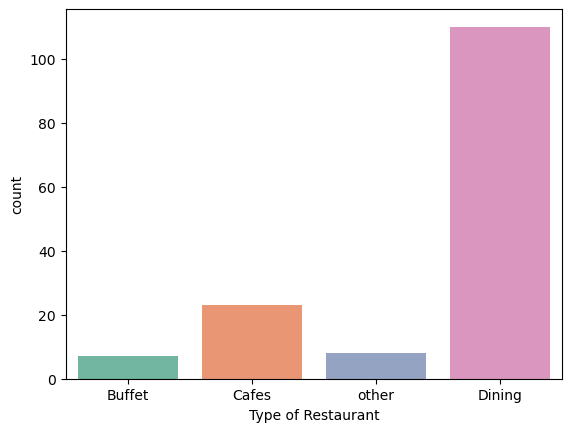

In [81]:

palette_colors = sns.color_palette("Set2", n_colors=df["listed_in(type)"].nunique())

sns.countplot(x="listed_in(type)", data=df, palette=palette_colors,hue="listed_in(type)")
plt.xlabel("Type of Restaurant")
plt.show()


## Dinning  type of restaurant do the majority of customers order

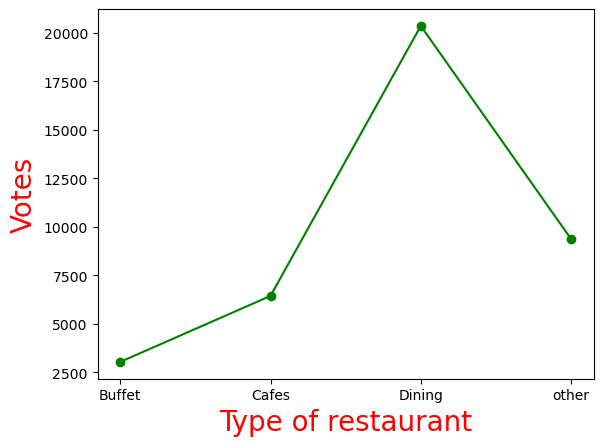

In [87]:

grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Plotting directly from the Series
plt.plot(grouped_data.index, grouped_data.values, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.show() # Add this line to display the plot


## plot shows the rate of each resturant 
## Dinning resturant has recived maximum votes

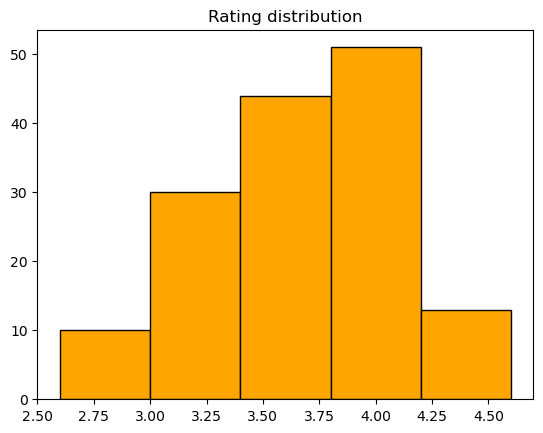

In [97]:
plt.hist(df["rate"], bins=5,  color='orange', edgecolor='black' )
plt.title("Rating distribution")
plt.show()

## The  majority of restaurants have received rating from 3.5 to 4 

In [90]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


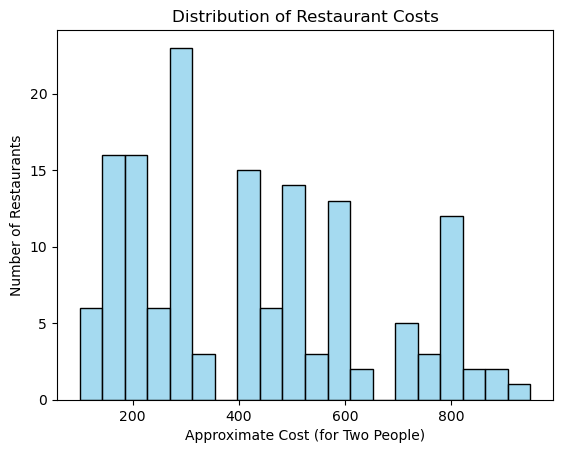

In [95]:
sns.histplot(data=df, x='approx_cost(for two people)', bins=20, color='skyblue')

plt.xlabel("Approximate Cost (for Two People)")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Costs")
plt.show()


## The majority of couples prefer resturant with approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

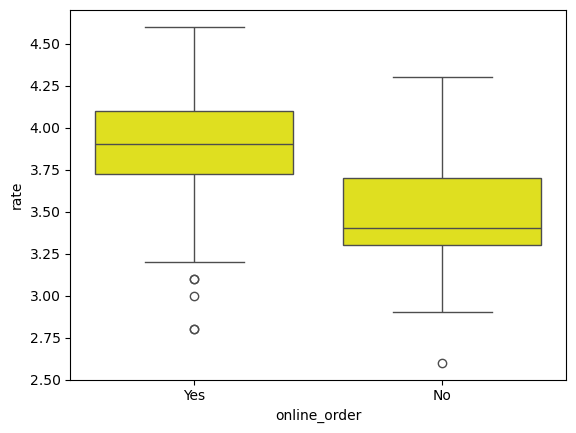

In [100]:
sns.boxplot(data=df, x='online_order', y='rate', color='yellow')


## onlone order resive higher rating in comparison oflinr order

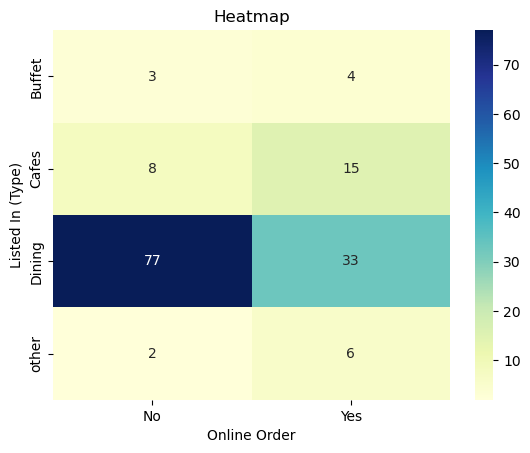

In [108]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
